<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2020-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones básicas en pandas
* Preprocesamiento y exploración inicial de datos
* Regresión Lineal Multivariada
* PCA, LDA
* Selección de atributos _from scratch_, Métodos Wrapper e Información Mutual
* Selección de modelos por _Cross Validation_


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2020 Tarea1]
* Fecha de entrega y presentaciones: 5 de Junio. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Aprendizaje con regresión lineal  <br>
[2.](#segundo) Clasificación con regresión logística <br>
[3.](#tercero) Selección de atributos<br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_.

# 1. Aprendizaje con regresión lineal

La regresión lineal, modelo que busca la mejor forma de combinar linealmente variables para predecir otra variable numérica es una de las herramientas más básicas a nuestra disposición. Sin embargo se pueden encontrar muchas aplicaciones a esta aproximación con buenos resultados, y suele ser un buen punto de partida para problemas totalmente desconocidos, dada su velocidad de implementación y facilidad de interpretación. Además, al igual que muchas de las técnicas de *Machine Learning*, no tiene un ámbito de uso definido, es decir podemos aplicar un método similar para problemas radicalmente distintos. <br><br>

<img src="https://as01.epimg.net/us/imagenes/2020/04/21/tikitakas/1587483013_564681_1587483300_noticia_normal_recorte1.jpg" style="height:50%;" />

En esta primera parte de la tarea, trabajaremos con un dataset de Kaggle llamado "COVID-19 State Data", el cual contiene el registro del número de infectados, recuperados y muertos debido a la pandemia de COVID-19 junto a datos pertinentes a cada Estado, los cuales pueden llegar a ser relevantes para analizar los resultados que está obteniendo cada Estado por separado. <br>

Este dataset puede ser descargado en la siguiente página:<br>
https://www.kaggle.com/nightranger77/covid19-state-data <br>

**Este dataset se está actualizando semana a semana, por lo cual es importante que ambos miembros del equipo estén trabajando con la misma versión y cuenten con el mismo archivo .csv al realizar este ítem.**

En la página Kaggle verán inicialmente un banner con el nombre "COVID-19 State Data", en la parte inferior de este mismo banner podrán ver el nombre del usuario Kaggle que subió este dataset (Night Ranger), y a su derecha se puede ver la última fecha de actualización del dataset y el número de versión asociado. Al hacer click donde dice "updated X ago (versión Y)" se les permitirá trasladarse a versiones anteriores del dataset. Al momento de redactar este ítem se utilizó el Dataset asociado a la Version 11, subida el 24 de Abril. <br>

La versión con la que deseen trabajar es su elección, sin embargo por favor revisar que la versión que vayan a elegir no discrepe de manera abrupta respecto a la Version 11, es decir que tan solo cambien los números y/o fechas asociadas a algunas columnas, si existen nuevas columnas por favor notarlo puesto puede ser que requiera una manipulación distinta, utilizarlas será apreciado en tal caso (optativo).<br>

**Ingresar a continuación la versión del dataset a utilizar y la fecha de subida asociada:**

In [0]:
Version=11
Fecha_subida="04/24/20" # mm/dd/yy <- Utilizar notación estado unidense

from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
!mkdir .kaggle
!cp kaggle.json .kaggle/

In [3]:
!cp .kaggle/kaggle.json /root/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [4]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle datasets download nightranger77/covid19-state-data/version/11

covid19-state-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip covid19-state-data.zip

Archive:  covid19-state-data.zip
  inflating: COVID19_state.csv       


## 1.a Modulos y carga de datos
i) Comenzaremos cargando las librerias relevantes para el resto de la tarea y cargando los datos a un _DataFrame_ para facilitar su manipulación. Explore los tipos de datos que hemos cargado, sus valores y como se distribuyen (Más adelante se les pedirá graficar). Apoyándose en la página Kaggle donde fue descargado el dataset, entregue una descripción breve del significado de cada columna.

*Instale las librerías requeridas*

In [0]:
!pip install sklearn #p.ej

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
data = pd.read_csv("COVID19_state.csv")

In [0]:
data.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,5.8,1.054688,21.0,12.1,35.3,1900,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,2.7,0.930145,20.9,21.4,58.0,12205,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,3.5,0.956630,22.3,18.0,61.7,7150,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,4.5,0.966965,15.6,12.4,41.2,17806,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,3.9,0.975113,11.3,15.6,30.9,112906,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [0]:
data.describe()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
count,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.410493e+05,29796.294118,1682.450980,6.496451e+06,431.560508,0.466165,1466.411765,51597.607843,61497.333333,3.515686,0.963721,17.270588,15.241176,42.335294,19711.666667,101.921569,8332.156863,7.413725,1.215686,51.999020,74.107843,0.323529,0.376471,0.299020
std,2.937550e+05,54636.295408,3596.204245,7.450657e+06,1647.225920,0.023455,1562.124594,8224.387459,22648.274324,0.831233,0.031868,3.489429,3.669887,10.908416,22532.917088,88.881909,1256.751246,1.457535,1.758564,8.627992,14.885481,0.027116,0.019680,0.030936
min,1.163300e+04,399.000000,10.000000,5.670250e+05,1.286300,0.406300,94.000000,37994.000000,37948.000000,2.200000,0.888570,8.900000,9.600000,19.600000,1172.000000,7.000000,5982.000000,4.400000,0.000000,26.600000,38.700000,0.260000,0.350000,0.210000
25%,6.966150e+04,5206.000000,136.000000,1.802113e+06,50.604850,0.452050,327.000000,45981.000000,51156.000000,2.850000,0.942516,14.750000,13.000000,34.800000,5656.000000,44.500000,7390.000000,6.650000,0.000000,45.300000,65.400000,0.305000,0.370000,0.290000
50%,1.538000e+05,12376.000000,467.000000,4.499692e+06,108.049700,0.468000,1134.000000,49417.000000,57492.000000,3.400000,0.958850,17.100000,14.800000,42.600000,12205.000000,89.000000,8107.000000,7.400000,1.000000,51.700000,74.200000,0.320000,0.370000,0.300000
75%,2.778375e+05,33591.500000,1676.500000,7.587794e+06,223.983100,0.479500,1841.500000,56610.000000,65971.500000,3.800000,0.982687,19.300000,17.000000,48.350000,23991.500000,129.500000,9095.500000,8.150000,1.000000,58.300000,87.550000,0.340000,0.385000,0.310000
max,1.467739e+06,352845.000000,22843.000000,3.993749e+07,11814.541000,0.542000,7338.000000,74561.000000,200277.000000,5.800000,1.054688,26.000000,26.100000,64.300000,112906.000000,523.000000,11944.000000,12.800000,9.000000,70.700000,100.000000,0.420000,0.480000,0.370000


ii) Descarte la columna que contiene el nombre de los Estados:

In [0]:
data = data.drop(columns=["State"])

## 1.b Manipulación de datos
 
i) Sabemos que "School Closure Date" indica la fecha de cierre de escuelas en cada Estado, existiendo valores perdidos (NaN) cuando no se han cerrado escuelas aún. Reemplaze estos NaN con la fecha de subida de la versión de dataset con la cual está trabajando

In [0]:
data['School Closure Date']=data['School Closure Date'].fillna(Fecha_subida)

ii) Transforme los valores de esta columna a un valor numérico que indique el número de días que han pasado desde la fecha de cierre de escuelas en cada Estado hasta el día de hoy. *(Consejo: Revise el calendario)*

In [0]:
import datetime as dt

In [0]:
today = dt.date.today()
#that_day = dt.date()

k = 0
s=data['School Closure Date'].copy()
for i in data['School Closure Date']:
    mes = int(i.split("/")[0])
    dia = int(i.split("/")[1])
    anio = int("20"+ i.split("/")[2])
    that_day = dt.date(anio, mes, dia)
    s[k] = (today - that_day).days
    k += 1

data['School Closure Date']=s

In [0]:
print(data['School Closure Date'].describe())

count     51
unique     7
top       86
freq      23
Name: School Closure Date, dtype: int64


iii) Comente una ventaja y desventaja de haber manipulado esta columna de este modo.

La desventaja de haber manipulado la fecha es que ahora sería necesario hacer el computo inverso para conocerla. La ventaja es que conociendo la cantidad de dias es posible obtener estadísticas importantes como la esperanza, la varianza, etc. y también hace posible los computos necesarios para realizar predicciones.

*Manipular esta columna de otro modo y de manera justificada será apreciado. Puede incluso botarla si lo estima*

Otra posible opción sería convertir la fecha de cierre en el numero de días que han pasado desde principio del año 2020 hasta la fecha de cierre. La fecha de partida o del día de hoy como en el caso anterior, puede ser completamente arbitraria y carente de representatividad, por lo tanto la diferencia es entre el cierre y la fecha escogida.

In [0]:
new_y_2020 = dt.date(2020, 1, 1)

k = 0
s=data['School Closure Date'].copy()
for i in data['School Closure Date']:
    mes = int(i.split("/")[0])
    dia = int(i.split("/")[1])
    anio = int("20"+ i.split("/")[2])
    that_day = dt.date(anio, mes, dia)
    s[k] = (that_day - new_y_2020).days
    k += 1

data['School Closure Date']=s

In [0]:
print(data['School Closure Date'].describe())

count     51
unique     7
top       75
freq      23
Name: School Closure Date, dtype: int64


##  1.c  Visualización pre-estandarización
i) Visualize las distribuciones de cada atributo del dataset mediante boxplots, histogramas, o lo que estime conveniente.

Por favor notar que algunos boxplot estan representados en escalas de potencias de 10. Por ejemplo 1e7.

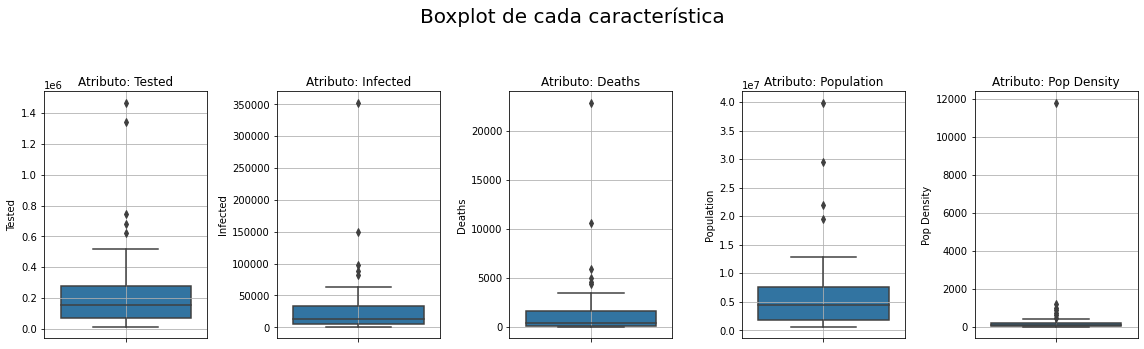

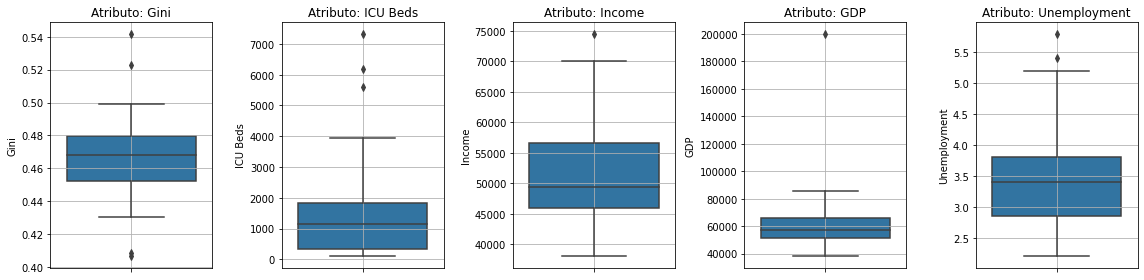

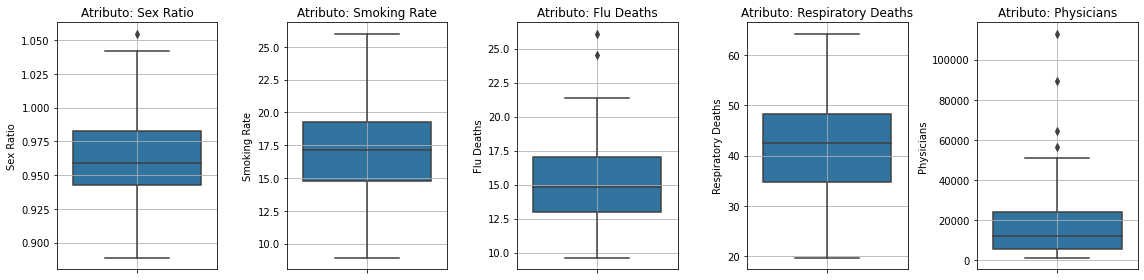

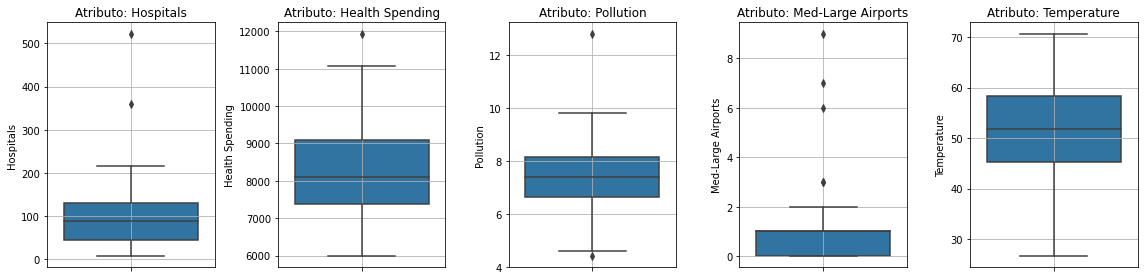

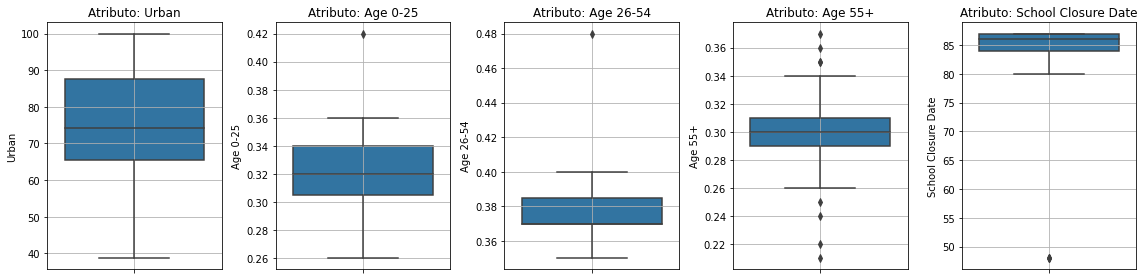

In [0]:
plt.rcParams['figure.figsize']=[16,4] # <- Controla el tamaño del plot dentro del Notebook
import seaborn as sns  # <- Herramienta complementaria para distintos tipos de plots
data_pre=data.astype(float)


plt.suptitle('Boxplot de cada característica',size=20,y=1.2)
k=1

for i in data_pre.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.boxplot(y=data_pre[str(i)], data=data_pre)
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

ii) ¿Reconoce outliers? ¿Qué consecuencias podría tener el aplicar una técnica de regresión lineal para predicciones en este dataset?

Se reconocen multiples outliers en algunos boxplot, es interesante observar que el atributo que acaba de ser procesedado (School Closure Date), posee un outlier bastante alejado de la media y fue primera escuela en cerrar, mucho antes que el resto.

Aplicar una técnica de regresión lineal con un dataset con outliers como éste podría significar una predicción con un error muy alto, ya que los outliers perturban bastante a los parámetros de la regresión.

iii) Comente, con fundamentos matemáticos, qué calcula la matriz de correlación y cómo se interpretan sus resultados en general. (Jupyter permite utilizar notación de latex, como ejemplo: $\sum_{n=1}^{N}x^2$)

Se refiere al grado en que un par de variables están linealmente relacionadas, cuando se obtiene un valor cercano a 1 es directamente linear (creciente), en caso de obtener un valor cercano a -1, es inversamente lineal (decreciente). Si se obtiene un valor cercano a 0, significa que no hay correlacion.

iv) Calcule la matriz de correlación entre características para luego graficarla.

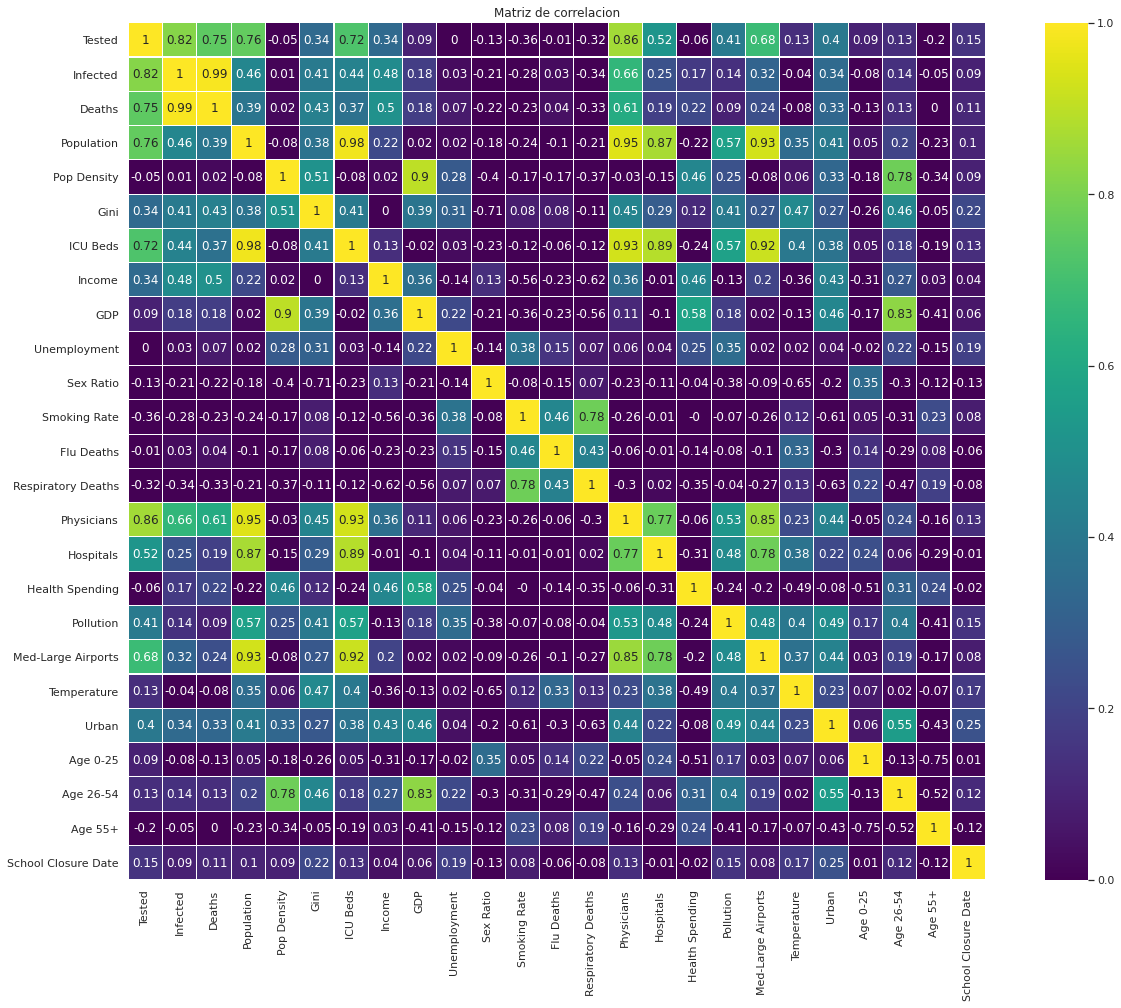

In [0]:
plt.figure(figsize=(18,14))   # <- Otro modo de controlar el tamaño del plot dentro del Notebook
sns.heatmap(np.around(data_pre.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.tight_layout()
plt.title('Matriz de correlacion');
plt.show()

v) En base a la matriz de correlación que ha graficado, ¿Cómo se relacionan el resto de las variables con el número de tests, casos y muertes? (Cuáles son las más relevantes, no es necesario que comente cada variable).

Variables relacionadas con el número de ***Test*** en orden decreciente

*   Médicos                      (0.86)
*   Infectados                   (0.82)
*   Población                    (0.76)
*   Muertes                      (0.75)
*   Camas ICU                    (0.72)
*   Aeropuertos medianos grandes (0.68)
*   Hospitals                    (0.52)
$$$$

Variables relacionadas con el número de ***Infectados*** en orden decreciente

*   Muertes   (0.99)
*   Testeados (0.82)
*   Medicos   (0.66)
$$$$

Variables relacionadas con el número de ***Muertes*** en orden decreciente

*   Infectados (0.99)
*   Testeados  (0.75)
*   Medicos    (0.61)
$$$$

Además de estas relaciones, es interesante observar la relacion que tiene ***Pop Density*** con ***Age 26-54***

vi) ¿Cree que se cuenta con suficiente información para sacar conclusiones? Comente las debilidades que presenta el dataset respecto a la aplicación de un análisis lineal para realizar predicciones.

Tal y como se mostró en la matriz de correlación existen muy pocas características que presentan correlación lineal, por lo tanto para el resto de las características se dificulta obtener un buen resultado en términos de analisis lineal para hacer predicciones. Se podría decir que hay información para sacar un par de conclusiones, pero no la suficiente para sacar **buenas** conclusiones.

## 1.d  Separación de datos
i) Separaremos los datos en *train, validation y test* con aproximadamente 85%, 10% y 5% (porcentajes de libre elección) de los datos respectivamente. Verifique las proporciones.

In [0]:
data_pre=data.astype(float)
data_train, data_temp = train_test_split(data_pre, test_size= 0.2)
data_val, data_test = train_test_split(data_temp, test_size= 0.4)

In [0]:
print("Training set proportion: "+ str((len(data_train)/len(data_pre))*100)+ "% percent of data")
print("Validation set proportion: "+ str((len(data_val)/len(data_pre))*100)+ "% percent of data")
print("Testing set proportion: "+str((len(data_test)/len(data_pre))*100)+ "% percent of data")
print(len(data_train)/len(data_pre) + len(data_val)/len(data_pre) + len(data_test)/len(data_pre))

Training set proportion: 78.43137254901961% percent of data
Validation set proportion: 11.76470588235294% percent of data
Testing set proportion: 9.803921568627452% percent of data
1.0


ii) Comente los trade-offs existentes al asignar porcentajes mayores o menores a cada conjunto (entrenamiento [train], validación [validation] y prueba [test]), en particular con el dataset que se está trabajando

Se podría decir que el modelo será de alta complejidad, ya que tendrá muchos parámetros que ajustar, por lo tanto al tener un porcentaje muy alto de ***training set*** es posible que se produzca overfitting, sobretodo para este dataset. Con un buen tamaño de ***validation set*** el modelo puede generalizar mejor, ya que (si hubiera suficientes datos) se podría tunear el *K* del *K-folds* o el $\alpha$, o cualquier *hiperparámetro* (que no depende de los datos) presente en el modelo. Por otro lado un buen tamaño de ***test set*** permite hacer más robusto el experimento, ya que se le estaría dando mayor credibilidad al modelo en cuestión.

iii) Trataremos de predecir dos variables distintas, número de infectados y muertos. Separe la entrada y salida para cada conjunto (entrenamiento [train], validación [validation] y prueba [test]). Separe los dos targets del resto de las variables

In [0]:
y1_tr= data_train["Infected"]
y2_tr= data_train["Deaths"]
x_tr= data_train.drop(columns=['Infected','Deaths'])

y1_val= data_val["Infected"]
y2_val= data_val["Deaths"]
x_val= data_val.drop(columns=['Infected','Deaths'])

y1_tst= data_test["Infected"]
y2_tst= data_test["Deaths"]
x_tst= data_test.drop(columns=['Infected','Deaths'])

iv) Realice la estandarización:

In [0]:
scaler_x = StandardScaler()
scaler_y1 = StandardScaler()
scaler_y2 = StandardScaler()

scaler_x.fit(x_tr.values)
scaler_y1.fit(y1_tr.values.reshape(-1,1))
scaler_y2.fit(y2_tr.values.reshape(-1,1))

x_tr_st=scaler_x.transform(x_tr.values)
x_val_st=scaler_x.transform(x_val.values)
x_tst_st=scaler_x.transform(x_tst.values)

y1_tr_st= scaler_y1.transform(y1_tr.values.reshape(-1,1))
y1_val_st= scaler_y1.transform(y1_val.values.reshape(-1,1))
y1_tst_st= scaler_y1.transform(y1_tst.values.reshape(-1,1))

y2_tr_st= scaler_y2.transform(y2_tr.values.reshape(-1,1))
y2_val_st= scaler_y2.transform(y2_val.values.reshape(-1,1))
y2_tst_st= scaler_y2.transform(y2_tst.values.reshape(-1,1))

v) (Para futuro uso) Junte el proceso realizado en una función de python

In [0]:
def call_separation_of_data(data,v1,v2):

    data_pre=data.astype(float)
    data_train, data_temp = train_test_split(data_pre, test_size= v1)
    data_val, data_test = train_test_split(data_temp, test_size= v2)

    cond = len(data_train)/len(data_pre) + len(data_val)/len(data_pre) + len(data_test)/len(data_pre)
    if round(cond, 3) != float(1):
      raise "v1: {} y v2: {} incorrectos!".format(v1, v2)

    

    y1_tr= data_train["Infected"]
    y2_tr= data_train["Deaths"]
    x_tr= data_train.drop(columns=['Infected','Deaths'])

    y1_val= data_val["Infected"]
    y2_val= data_val["Deaths"]
    x_val= data_val.drop(columns=['Infected','Deaths'])

    y1_tst= data_test["Infected"]
    y2_tst= data_test["Deaths"]
    x_tst=data_test.drop(columns=['Infected','Deaths'])



    scaler_x = StandardScaler()
    scaler_y1 = StandardScaler()
    scaler_y2 = StandardScaler()

    scaler_x.fit(x_tr.values)
    scaler_y1.fit(y1_tr.values.reshape(-1,1))
    scaler_y2.fit(y2_tr.values.reshape(-1,1))
    
    x_tr_st=scaler_x.transform(x_tr.values)
    x_val_st=scaler_x.transform(x_val.values)
    x_tst_st=scaler_x.transform(x_tst.values)

    y1_tr_st= scaler_y1.transform(y1_tr.values.reshape(-1,1))
    y1_val_st= scaler_y1.transform(y1_val.values.reshape(-1,1))
    y1_tst_st= scaler_y1.transform(y1_tst.values.reshape(-1,1))

    y2_tr_st= scaler_y2.transform(y2_tr.values.reshape(-1,1))
    y2_val_st= scaler_y2.transform(y2_val.values.reshape(-1,1))
    y2_tst_st= scaler_y2.transform(y2_tst.values.reshape(-1,1))
    
    return(x_tr, y1_tr, y2_tr, x_val, y1_val, y2_val, x_tst, y1_tst, y2_tst, x_tr_st, y1_tr_st, y2_tr_st, x_val_st, y1_val_st, y2_val_st, x_tst_st, y1_tst_st, y2_tst_st)

vi) Grafique nuevamente la matriz de correlación con los datos estandarizados:

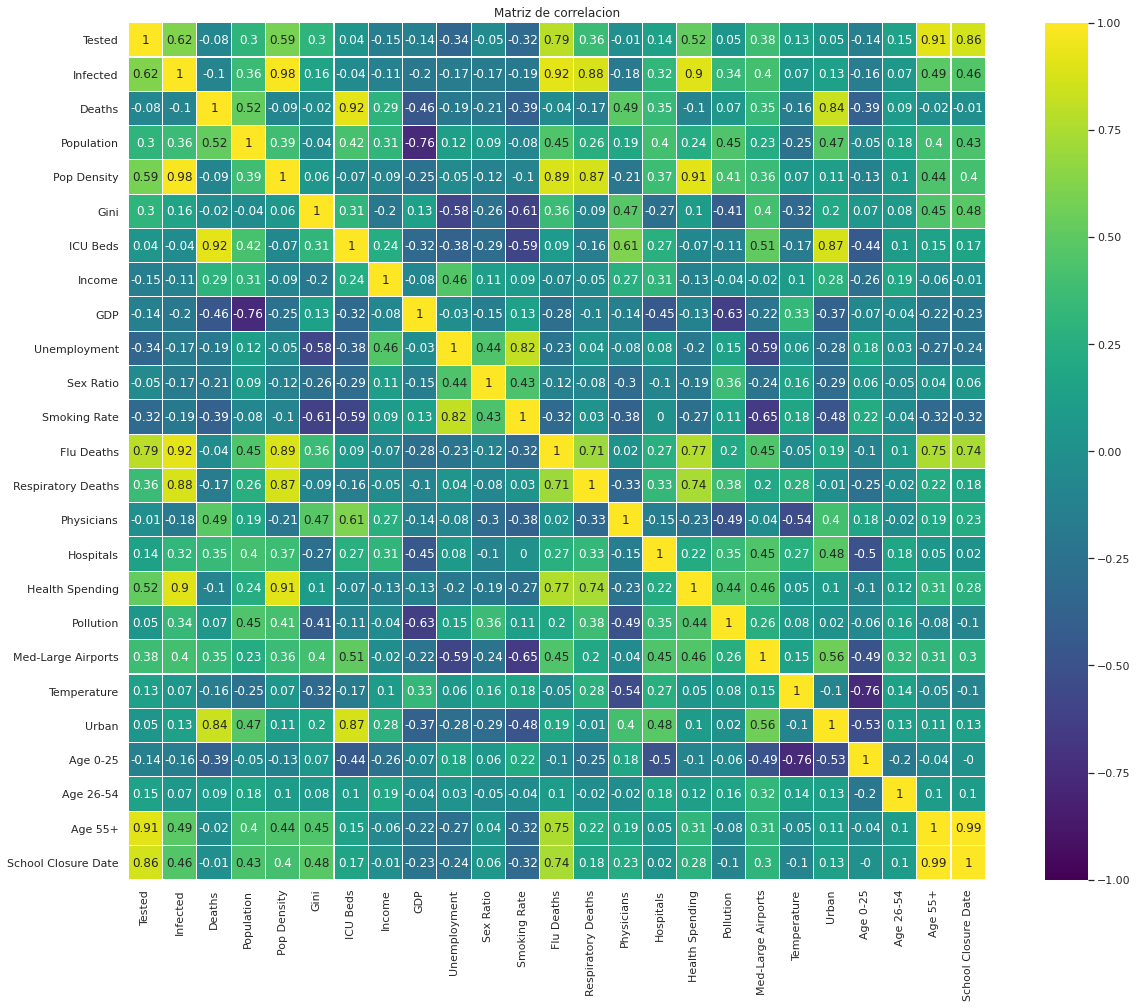

In [0]:
data_post=pd.DataFrame(np.concatenate((x_tr_st,y1_tr_st,y2_tr_st),axis=1),columns=data_pre.columns)
plt.figure(figsize=(18,14))   # <- Otro modo de controlar el tamaño del plot dentro del Notebook
sns.heatmap(np.around(data_post.corr(),decimals=2), vmax=1,vmin=-1, linewidths=0.1, square=True,annot=True,cmap='viridis',linecolor="white");
sns.set(font_scale=1)
plt.tight_layout()
plt.title('Matriz de correlacion');
plt.show()

vii) Comente el cambio de la matriz de correlación, ¿qué influyó?:

Ahora se ven correlaciones que antes no se veían, y también desaparecieron otras que anteriormente habían. Lo que pasaba anteriormente se comparaba media y varianza, covarianza y correlación sobre variables que estaban en una escala distinta y no centradas en 0, por lo tanto se estaban comparando números incomparables, ahora como todas las características están estandarizadas, es mucho más justo comparar sus estadísticas entre ellas. Además anteriormente era toda la data, ahora solo se utilizó el conjunto de entrenamiento.

## 1.e Primera Regresión

i) Realice una regresión lineal con los datos escalados y no escalados para predecir el número de **infectados y muertos de manera separada**.

In [0]:
from sklearn.metrics import mean_squared_error

reg_unscaled1 = LinearRegression()
reg_unscaled1.fit(x_tr, y1_tr)
unscaled_predictions1 = reg_unscaled1.predict(x_tst)
s1 = reg_unscaled1.score(x_tst, y1_tst)
print("(Infections) Score for unscaled regression is:", s1)
print("(Infections) Mean squared error for unscaled regression is:", mean_squared_error(y1_tst, unscaled_predictions1))

reg_unscaled2 = LinearRegression()
reg_unscaled2.fit(x_tr, y2_tr)
unscaled_predictions2 = reg_unscaled1.predict(x_tst)
s2 = reg_unscaled1.score(x_tst, y2_tst)
print("(Deaths) Score for unscaled regression is:", s2)
print("(Deaths) Mean squared error for unscaled regression is:",mean_squared_error(y2_tst, unscaled_predictions2))

(Infections) Score for unscaled regression is: -1.0217933150108856
(Infections) Mean squared error for unscaled regression is: 3793999362.2540264
(Deaths) Score for unscaled regression is: -751.5144038702318
(Deaths) Mean squared error for unscaled regression is: 6700978372.612235


In [0]:
reg_scaled1 = LinearRegression()
reg_scaled1.fit(x_tr_st, y1_tr_st)
scaled_predictions1 = reg_scaled1.predict(x_tst_st)
ss1 = reg_scaled1.score(x_tst_st, y1_tst_st)
print("(Infections) Score for scaled regression is:", ss1)
print("(Infections) Mean squared error for scaled regression is:", mean_squared_error(y1_tst, scaled_predictions1))

reg_scaled2 = LinearRegression()
reg_scaled2.fit(x_tr_st, y2_tr_st)
scaled_predictions2 = reg_scaled2.predict(x_tst_st)
ss2 = reg_scaled2.score(x_tst_st, y2_tst_st)
print("(Deaths) Score for scaled regression is:", ss2)
print("(Deaths) Mean squared error for scaled regression is:",mean_squared_error(y2_tst, scaled_predictions2))

(Infections) Score for scaled regression is: -1.0217933150025202
(Infections) Mean squared error for scaled regression is: 2760555602.387975
(Deaths) Score for scaled regression is: -1.1146447568225248
(Deaths) Mean squared error for scaled regression is: 11457619.59763855


ii) Compare sus _scores_. ¿Cual es la fórmula del *score* que utiliza el regresor? (puede buscar en la documentación) ¿Qué interpretación se le puede dar al _score_? Puede concluir que los datos escalados o no escalados entregan un mejor modelo? ¿Sobre qué conjunto de datos (*train, test o valitdation*) deberíamos comparar el *score*?

La fórmula utilizada es el coeficiente de determinación, que corresponde a:

$$ R^2 = 1 - \frac{SS_{Regression}}{SS_{Total}} $$
$$ SS_{Total} = \sum_{i=1}^{m} (y_i - \overline{y})^2 $$
$$ SS_{Regression} = \sum_{i=1}^{m} (y_i - y_{Regression})^2 $$

Si este score da cercano a 1 es por que el sustraendo es cercano a 0, lo cual sucede si error de la regresión es pequeño. Lo que sucedió acá es que el modelo es tan malo que el sustraendo dió mayor a 1, ya que el error fué demasiado grande. se puede concluir que al menos para la variable de muertos, el modelo mejoró considerablemente, pero sigue teniendo un pésimo desempeño.

La idea es comparar los score con el conjunto de test, ya que si se les compara con los otros conjuntos sería como hacer trampa, ya que el modelo entrenó con esos datos y en este caso probablemente los memorizó, por lo tanto no tendría credibilidad.

iii) Añada a la función creada en el item 1.d el ajuste lineal realizado, de modo que al llamar la función modificada se impriman los scores asociados a cada ajuste de curva y retorne los conjuntos de entrenamiento, validación y prueba utilizados más los coeficientes de las regresiones realizadas.

In [0]:
from sklearn.metrics import mean_squared_error
def call_regressions(data,v1,v2):
  
    x_tr, y1_tr, y2_tr, x_val, y1_val, y2_val, x_tst, y1_tst, y2_tst, x_tr_st, y1_tr_st, y2_tr_st, x_val_st, y1_val_st, y2_val_st, x_tst_st, y1_tst_st, y2_tst_st=call_separation_of_data(data,v1,v2)
    
    reg_unscaled1 = LinearRegression()
    reg_unscaled1.fit(x_tr, y1_tr)
    unscaled_predictions1 = reg_unscaled1.predict(x_tst)
    s1 = reg_unscaled1.score(x_tst, y1_tst)
    m1 = mean_squared_error(y1_tst, unscaled_predictions1)
    
    reg_unscaled2 = LinearRegression()
    reg_unscaled2.fit(x_tr, y2_tr)
    unscaled_predictions2 = reg_unscaled2.predict(x_tst)
    s2 = reg_unscaled2.score(x_tst, y2_tst)
    m2 = mean_squared_error(y2_tst, unscaled_predictions2)    

    reg_scaled1 = LinearRegression()
    reg_scaled1.fit(x_tr_st, y1_tr_st)
    scaled_predictions1 = reg_scaled1.predict(x_tst_st)
    ss1 = reg_scaled1.score(x_tst_st, y1_tst_st)
    ms1 = mean_squared_error(y1_tst, scaled_predictions1)
    

    reg_scaled2 = LinearRegression()
    reg_scaled2.fit(x_tr_st, y2_tr_st)
    scaled_predictions2 = reg_scaled2.predict(x_tst_st)
    ss2 = reg_scaled2.score(x_tst_st, y2_tst_st)
    ms2 = mean_squared_error(y2_tst, scaled_predictions2)
    
    
    return (s1, m1, s2, m2, ss1, ms1, ss2, ms2)

iv) Ejecute repetidas veces, no es necesario que reporte todos los resultados, tan solo reportar la variabilidad y concluír al respecto tomando en cuenta sus comentarios anteriores.

In [0]:
sets_size = [(0.1, 0.1), (0.15, 0.1), (0.2, 0.1), (0.25, 0.1), (0.3, 0.1), (0.4, 0.1),      
             (0.1, 0.15), (0.15, 0.15), (0.2, 0.15), (0.25, 0.15), (0.3, 0.15), (0.4, 0.15),
             (0.1, 0.2), (0.15, 0.2), (0.2, 0.2), (0.25, 0.2), (0.3, 0.2), (0.4, 0.2),      
             (0.1, 0.25), (0.15, 0.25), (0.2, 0.25), (0.25, 0.25), (0.3, 0.25), (0.4, 0.25),
             (0.1, 0.3), (0.15, 0.3), (0.2, 0.3), (0.25, 0.3), (0.3, 0.3), (0.4, 0.3),      
             (0.1, 0.4), (0.15, 0.4), (0.2, 0.4), (0.25, 0.4), (0.3, 0.4), (0.4, 0.4)]
  
regs=list()
for i in sets_size:
  v1, v2 = i
  regs.append(call_regressions(data,v1,v2))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

In [0]:
len(regs)

34

In [0]:
print(np.argmax(regs2, axis=0))
print(np.argmin(regs2, axis=0))

print(np.argmax(regs2, axis=0)[::2])
print(np.argmin(regs2, axis=0)[1::2])

[ 0 16  0 16  0 22  0 22]
[ 0  6  0  7  0 29  0  0]
[0 0 0 0]
[ 6  7 29  0]


v) Quédese con un ajuste que entregue un ""buen"" resultado, imprima los coeficientes asociados a cada atributo del dataset:

In [0]:
import math
from collections import Counter
for i in range(len(regs)):
  if i < len(regs):    
    # Remover los conjuntos que producen NaN
    s1, m1, s2, m2, ss1, ms1, ss2, ms2 = regs[i]    
    if math.isnan(s1) or math.isnan(m1) or math.isnan(s2) or math.isnan(m2) or math.isnan(ss1) or math.isnan(ms1) or math.isnan(ss2) or math.isnan(ms2):
      regs.remove(regs[i])
      sets_size.remove(sets_size[i])


regs2 = np.array(regs)

# Encontrar el conjunto con score mas alto (impares)
maxi = Counter(np.argmax(regs2, axis=0)[::2])
maximo = -np.inf
for k in maxi.keys():                
    if maxi[k] > maximo:
        maximo = k


# Encontrar el conjunto con MSE mas bajo (pares)
mini = Counter(np.argmin(regs2, axis=0)[1::2])
minimo = -np.inf
for k in mini.keys():                
    if mini[k] > minimo:
        minimo = k

s1, _, s2, _, ss1, _, ss2, _ = regs[maximo]
_, m1, _, m2, _, ms1, _, ms2 = regs[minimo]

print("(Infections) Score for unscaled regression is:", s1)
print("(Infections) Mean squared error for unscaled regression is:", m1)
print("(Deaths) Score for unscaled regression is:", s2)
print("(Deaths) Mean squared error for unscaled regression is:", m2)
print("(Infections) Score for scaled regression is:", ss1)
print("(Infections) Mean squared error for scaled regression is:", ms1)
print("(Deaths) Score for scaled regression is:", ss2)
print("(Deaths) Mean squared error for scaled regression is:", ms2)

v1_s, v2_s = sets_size[maximo]
v1_M, v2_M = sets_size[minimo]
print("\nLa mejor combinacion de v1 y v2 para el score respectivamente es: {} y {}".format(v1_s, v2_s))
print("La mejor cobinación para los train, validation, test set segun score: {}%, {}%, {}%".format((1-v1_s)*100, v1_s*(1-v2_s)*100, v1_s*v2_s*100))
print("\nLa mejor combinacion de v1 y v2 para el MSE respectivamente es: {} y {}".format(v1_M, v2_M))
print("La mejor cobinación para los train, validation, test set segun MSE: {}%, {}%, {}%".format((1-v1_M)*100, v1_M*(1-v2_M)*100, v1_M*v2_M*100))

(Infections) Score for unscaled regression is: 0.956150725926307
(Infections) Mean squared error for unscaled regression is: 36129450.71947249
(Deaths) Score for unscaled regression is: 0.5492921060406705
(Deaths) Mean squared error for unscaled regression is: 108372.54812642669
(Infections) Score for scaled regression is: 0.9561507259251262
(Infections) Mean squared error for scaled regression is: 56377320.46325276
(Deaths) Score for scaled regression is: 0.5492921060307228
(Deaths) Mean squared error for scaled regression is: 156221.28171774562

La mejor combinacion de v1 y v2 para el score respectivamente es: 0.1 y 0.25
La mejor cobinación para los train, validation, test set segun score: 90.0%, 7.500000000000001%, 2.5%

La mejor combinacion de v1 y v2 para el MSE respectivamente es: 0.1 y 0.4
La mejor cobinación para los train, validation, test set segun MSE: 90.0%, 6.0%, 4.000000000000001%


vi) Comente:

Lo que se hizo fué por cada par v1, v2 calcular el R2_score y el MSE de las 2 predicciones para datos escalados y no escalados. Al tener estos 8 datos, encontrar la mejor combinación de v1 y v2 consistió en calcular el menor (MSE) y el maximo (score) valor para cada uno de los 8-vector para todas las combinaciones. La más pequeña representa al conjunto que produce menor MSE. La más grande representa al conjunto que produce el mayor R2-score.

El R2-score indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media. Por lo tanto el score de los set no escalados son los mismo que los escalados. Otra cosa importante de observar es que el split mezcla las filas antes de hacer la partición de forma aleatoria, y como los datos son tan variados, cada vez que se ejecuta el código anterior se obtienen resultados diferentes.

 #### 1.f  Tranformaciones simples
i) Grafique como se distribuyen los infectados para los datos no estandarizados, apóyese en el siguiente código. <br>

Viendo el gráfico, ¿Pareciera que una representación lineal funcionará bien para modelar este tipo de datos? <br>
 
Pruebe **un par** de transformaciones simples, como logaritmo o raíz cuadrada (libre elección) y comente los gráficos. <br>

¿Estos gráficos permiten concluír algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio? <br>

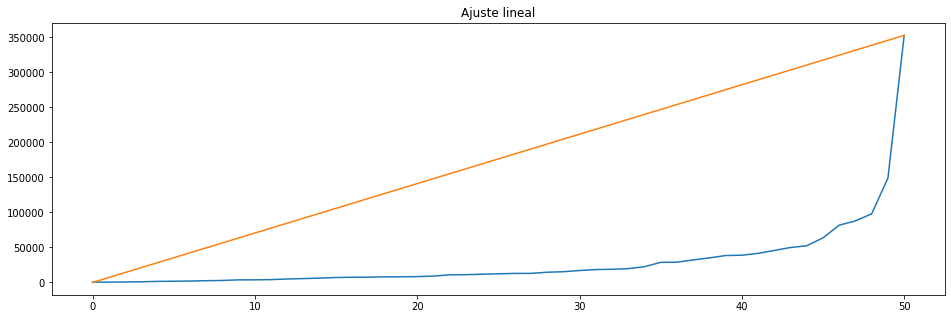

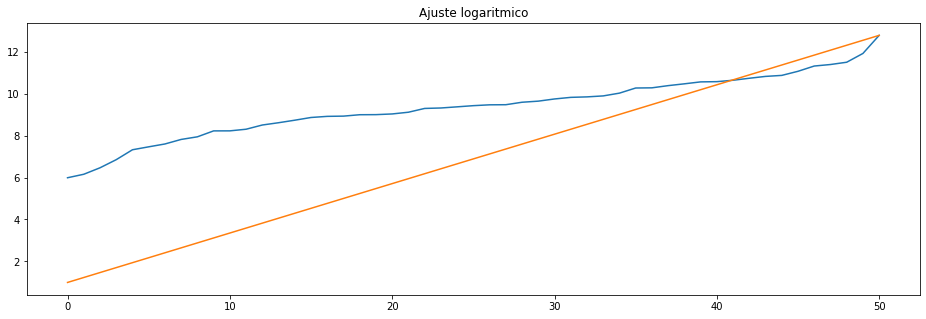

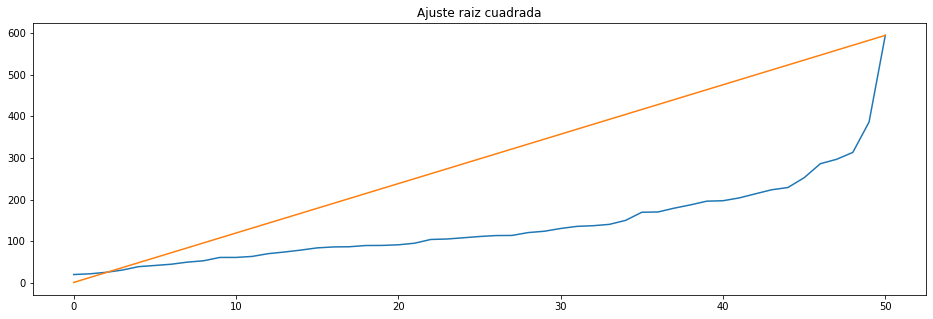

In [0]:
y=data_pre["Infected"]

# Gráfico de comparación entre una recta y los valores a predecir del dataset

plt.rcParams["figure.figsize"] = [16,5]
plt.plot(np.arange(0,y.shape[0],1),y.sort_values(),label='')
plt.plot(np.arange(0,y.shape[0],1),np.linspace(0,((y.sort_values())).max(),num=y.shape[0]),label='Ajuste lineal')
plt.title('Ajuste lineal')
plt.show()

x_log = np.arange(0,y.shape[0],1)
y_log = np.log(y.sort_values())
Y_log = np.linspace(1,y_log.max(),num=y.shape[0])
plt.plot(x_log, y_log)
plt.plot(x_log, Y_log)
plt.title('Ajuste logaritmico')
plt.show()

x_sr = np.arange(0,y.shape[0],1)
y_sr = np.sqrt(y.sort_values())
Y_sr = np.linspace(1,y_sr.max(),num=y.shape[0])
plt.plot(x_sr, y_sr)
plt.plot(x_sr, Y_sr)
plt.title('Ajuste raiz cuadrada')
plt.show()

Una representación lineal no es la mejor idea, ya que se puede observar la no linealidad de la variable. 

¿Estos gráficos permiten concluír algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio?

Sirven de análisis exploratorio, pero aclaran bastante hacia adonde va la transformación, ya que al menos el del logaritmo aplana bastante la curva, en dicho grafico es cosa de encontrar los parámetros sobre el ajuste logarítmico y debería mostrar un bue desempeño.

#### 1.g 10-_fold_ sobre la potencia
i) Probaremos la utilidad real de realizar una transformación del target del tipo $I \gets I^{i}$ con $i \in [-1,1]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estrucuta siguiente. Debe elegir un estimador del error de validación de cada modelo (_e.g._ mediana, promedio...) y comentar brevemente por qué eligio tal estimador. <br><br>
Luego grafique cómo varía el error de validación en función de _i_. <br><br>
Finalmente, con el mejor valor de $i$ encontrado, entrene un regresor lineal con todos los datos de entrenamiento y compare su densempeño con los modelos anteriores.<br><br>
¿Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo? 

In [0]:
folds = KFold(10)
xy_data=data_pre.drop(columns=['Deaths'])
errors = []
scores = []
validation_error = []
errors_indices = []
seq=np.linspace(-1,1,10)
minimo = np.inf
maximo = -np.inf
for i in seq:
    
    errors_i = []
    scores_i = []

    for train_index, val_index in folds.split(xy_data):
        y_=xy_data["Infected"]
        y_i = y_**(i)
        y_val_i = y_i[val_index]
        y_tr_i = y_i[train_index]
        x_=xy_data.drop(columns=["Infected"])
        x_val_i = x_.loc[val_index,:]
        x_tr_i = x_.loc[train_index,:]
        regression = LinearRegression()
        # entrene el modelo y guarde su score
        regression.fit(x_tr_i, y_tr_i)
        
        # calcular error del modelo y guardar
        predictions = regression.predict(x_val_i)
        error_i = mean_squared_error(y_val_i, predictions)
        score_i = regression.score(x_val_i, y_val_i)
        errors_i.append(error_i)
        scores_i.append(score_i)
        
    # escoger estimador de error del modelo, media mediana o etc del error de los 10 folds    
    error = np.mean(errors_i)
    score = np.mean(scores_i)
    errors.append(error)
    scores.append(score)

    if error < minimo:
      minimo = error
      indice_err = list(seq).index(i)

    if score > maximo:
      maximo = score
      indice_sco = list(seq).index(i)
        
print(min(errors))
print(max(scores))
print(indice_err)
print(indice_sco)

0
-0.21210983892936514
0
7


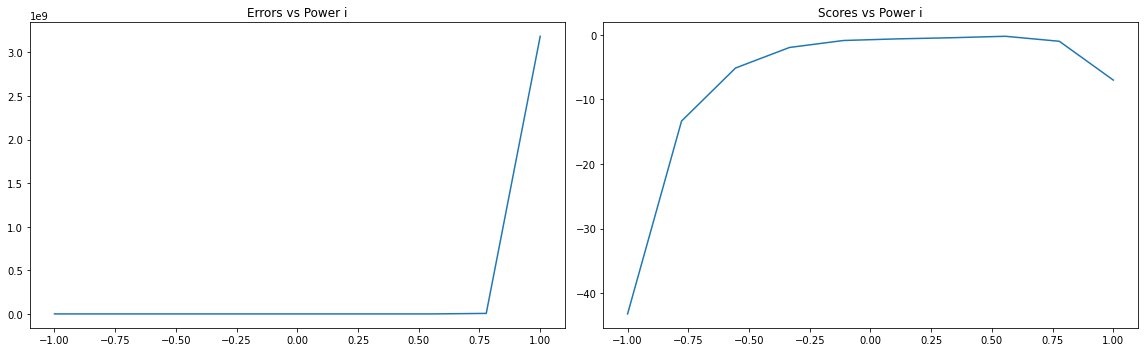

In [0]:
plt.rcParams["figure.figsize"]=[16,5]
plt.subplot(1,2,1)
plt.title('Errors vs Power i')
plt.plot(seq, errors)
plt.subplot(1,2,2)
plt.title('Scores vs Power i')
plt.plot(seq, scores)
plt.tight_layout()
plt.show()

In [0]:
xy_data=data_pre.drop(columns=['Deaths'])

data_tr, data_tst = train_test_split(xy_data, test_size=0.2)

x_tr = data_tr.drop(columns=["Infected"])
x_tst = data_tst.drop(columns=["Infected"])

best_results = [seq[indice_err], seq[indice_sco]]
for i in best_results:
    y_tr = data_tr["Infected"]**(i)
    y_tst = data_tst["Infected"]**(i)


    regression = LinearRegression()
    regression.fit(x_tr, y_tr)

    # calcular error del modelo y guardar
    predictions = regression.predict(x_tst)
    error = mean_squared_error(y_tst, predictions)
    score = regression.score(x_tst, y_tst)

    print("Menor error para i={}: {}".format(i, error))
    print("Mayor score para i={}: {}".format(i, score))
    print("\n")

Menor error para i=-1.0: 7.760564146181973e-07
Mayor score para i=-1.0: 0.08035933525462746


Menor error para i=0.5555555555555554: 14913.002292578434
Mayor score para i=0.5555555555555554: 0.8747585031625291




El desempeño aumentó considerablemente, los valores del error y del score son algo aceptable en comparación con las aberraciones obtenidas anteriormente. Definitivamente se puede afirmar que haciendo pequeñas transformaciones en los datos el modelo mejorará su rendimiento.

# 2. Clasificación con regresión logística. 

Para esta parte de la tarea, utilizaremos un conjunto de datos de mediciones al corazón en pacientes con distintas categorías de arritmia cardiaca. El _dataset_ puede descargarse desde https://www.kaggle.com/shayanfazeli/heartbeat, utilizaremos en particular los archivos `mitbh_train.csv` y `mitbh_test.csv`. Nuestro objetivo principal será predecir a partir de las mediciones clasificar la arritmia del paciente. Sin embargo también exploraremos técnicas de reducción de dimensionalidad para tratar de preprocesar los datos, pues una rápida exploración de los datos nos muestra que tenemos 188 atributos.<br><br>


<img src="https://www.sociedadsadec.org.ar/wp-content/uploads/2017/09/arritmias-cardiacas-02.png" style="height:100%;" />
<br>
Las 5 categorías son: <br><br>
N: Normal beat<br>
S: Supraventricular premature beat<br>
V: Premature ventricular contraction<br>
F: Fusion of ventricular and normal beat<br>
Q: Unclassifiable beat

**Ojo!: Este dataset es grande, considere usar Google Colab**

#### 2.a Carga de datos
i) Cargue los datos, identifique la columna `target`. ¿Por qué es necesario pasar una lista de id al cargar los datos?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv("mitbih_train.csv",names=[i for i in range(188)])
data_test = pd.read_csv("mitbih_test.csv",names=[i for i in range(188)])

In [3]:
data_train.rename(columns={187:"target"},inplace=True)
data_test.rename(columns={187:"target"},inplace=True)

El id es necesario para poder identificarlos en posteriores análisis.

ii) Explore los datos: ¿Están muy desbalanceadas las clases? ¿Qué tan dispares son las magnitudes de las mediciones? ¿Pareciera necesario estandarizar los datos antes de utilizarlos?

In [4]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Los datos están desbalaceados, puesto que tenemos más de un 75% de datos con target 0, dejando el otro 25% (o menos) para el resto de los 4 targets posibles. Esto genera mucha disparidad a la hora de querer evaluar y entrenar el modelo para los target distintos a 0. Pareciera que hay que estandarizar los datos, por lo que se procederá a hacerlo, una vez separadas los datos del target.

#### 2.b Correlación
Calcule la matriz de correlación, note que esto está implementado en pandas. Represéntela de alguna forma que le parezca adecuada, por ejemplo como un _heatmap_. ¿Qué observa?, comente.

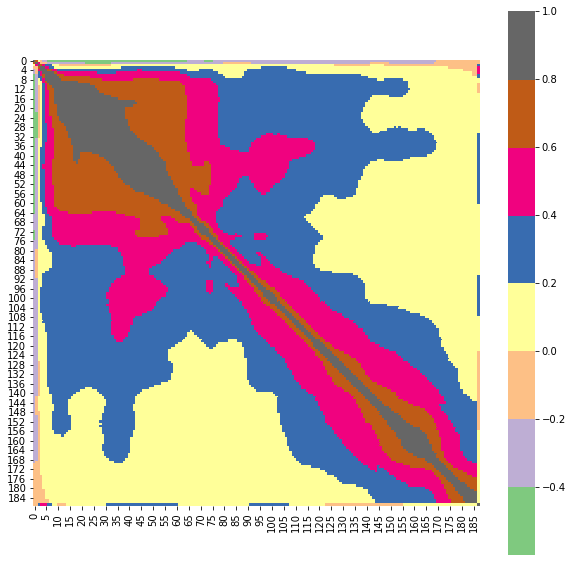

In [5]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_train.corr(), vmax=1,square=True,annot=False,cmap="Accent",cbar=True, ax=ax);

Al ver los datos a través de un heatmap, se puede notar como existe un fuerte correlación entre los primeros datos, con un valor mayor a 0.6 en los primeros 70 de estos, mientras que en el resto la correlación baja, dejando un valor de general de 0.4 o menor entre los primeros 70 datos y el resto de estos.

En cuanto a la correlación entre los últimos, esta tiende a subir al rango 0.4-0.6, incluso es mayor entre los últimos 30-40 datos, con valor sobre 0.2, llegando hasta el 1.

#### 2.c Regresión Logistica

i) Separe el dataset proveniente de mitbih_train.csv en train y validation. Separe los datos utilizando train_test_split. ¿Qué habría ocurrido por la forma en que se cargaron los datos si utilizamos la opción shuffle = False?

In [6]:
xy_train,xy_val= train_test_split(data_train, test_size= 0.3,shuffle=True)
x_tr = xy_train.drop(columns = ['target'])
y_tr = xy_train[["target"]]
x_val = xy_val.drop(columns = ['target'])
y_val = xy_val[["target"]]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Se estandarizan los datos 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr))
x_val = pd.DataFrame(scaler.fit_transform(x_val))

x_tr.describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,...,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000
mean,0.890698,0.759022,0.424595,0.218815,0.200828,0.210185,0.205644,0.201672,0.198572,0.196737,...,0.005441,0.004968,0.004536,0.004244,0.003906,0.003708,0.003511,0.003280,0.002974,0.002815
std,0.240693,0.221608,0.226750,0.206461,0.176703,0.171905,0.178598,0.177302,0.171669,0.168070,...,0.046417,0.043618,0.041238,0.039859,0.038547,0.037882,0.037073,0.035462,0.033026,0.031710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922481,0.684407,0.252712,0.048167,0.082278,0.088158,0.073171,0.066029,0.064871,0.068866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991228,0.827206,0.430518,0.166397,0.147601,0.158730,0.145299,0.144444,0.149901,0.149254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910870,0.578378,0.342017,0.258671,0.287347,0.297621,0.294915,0.290621,0.283079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Al tener la opción <b>shuffle = False</b> los datos de entrenamiento serían los correspondientes al primer 70% de estos, y dado que los datos vienen ordenados, se corre el riesgo de tener sólo datos de la categoría 0. Los cual no dejaría entrenar bien el modelo dado que no respresentaría a la realidad.

ii) Realice una primera regresión logística con los datos. ¿Qué fórmula utiliza el metodo `score`? (revise documentación)

In [38]:
x_tr.describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,...,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000,61287.000000
mean,0.890698,0.759022,0.424595,0.218815,0.200828,0.210185,0.205644,0.201672,0.198572,0.196737,...,0.005441,0.004968,0.004536,0.004244,0.003906,0.003708,0.003511,0.003280,0.002974,0.002815
std,0.240693,0.221608,0.226750,0.206461,0.176703,0.171905,0.178598,0.177302,0.171669,0.168070,...,0.046417,0.043618,0.041238,0.039859,0.038547,0.037882,0.037073,0.035462,0.033026,0.031710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922481,0.684407,0.252712,0.048167,0.082278,0.088158,0.073171,0.066029,0.064871,0.068866,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991228,0.827206,0.430518,0.166397,0.147601,0.158730,0.145299,0.144444,0.149901,0.149254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910870,0.578378,0.342017,0.258671,0.287347,0.297621,0.294915,0.290621,0.283079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression() #para sacar warnin agregar atributo max_iter=61287
reg.fit(x_tr,y_tr.values.ravel())
reg.predict(x_val)
reg.score(x_val,y_val)

/home/rodrigo/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.910381847946092

La función `score` regresa la precisión media de los datos entregados, es decir calcula la media de las predicciones correctas realizadas, frente al total. 

$score = \frac{VP + VN}{VP + VN + FP + FN}$

iii) Evalúe con el score el conjunto de test. ¿Cuál es la utilidad del conjunto de validación y de test? Explique cuáles son sus usos.

In [12]:
x_tst=data_test.drop(columns = ['target'])
y_tst = data_test[["target"]]
y_pred = reg.predict(x_tst)
reg.score(x_tst,y_tst)

0.9120683354650101

El conjunto de test se utiliza para la realización de la regresión logística, mientras que el conjunto de validación se utiliza para saber cómo anduvo la regresión con respecto a la realidad, y así evitar el sobreajuste.

iv) Calcule la matriz de confusión y comente respecto al valor dado por el `score`. Comente sobre la distinta información entregrada por la matriz de confusión y su interpretación. 

In [13]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_tst, y_pred)
confusion_matrix

array([[17839,    21,   198,    23,    37],
       [  344,   181,    31,     0,     0],
       [  904,    12,   483,    23,    26],
       [  107,     0,     8,    47,     0],
       [  197,     0,    19,     0,  1392]])

La matriz de confusión muestra la clasificación de los distintos datos, en contraposición de los reales, lo que ayuda en este caso a saber cuales datos son los que fueron mal clasificados y dónde se equivoca el predictor. Al contrario del score, que sólo dice cuales son realmente bien clasificados, en contra del total.

#### 2.d Otra métrica. 
Otra forma de comparar modelos podría ser con la siguiente métrica. Esta mide la cantidad de aciertos pero toma en cuenta algo más. ¿Que interpretación podría darle a la métrica en el código? 

Si un modelo entrega 0.5 y otro 0.4 en esta métrica, cual es mejor? 

In [14]:
np.mean((np.max(reg.predict_proba(x_val),axis=1)*(reg.predict(x_val)-np.transpose(y_val)))**2)

14848    0.000000
35214    0.000000
19779    0.000000
82791    0.000000
87117    7.263333
           ...   
81642    0.000000
61607    0.000000
5111     0.000000
40802    0.000000
67338    0.000000
Length: 26267, dtype: float64

La primera parte `np.max(reg.predict_proba(x_val),axis=1)` regresa para cada fila la probabilidad con la que fue clasificada, la segunda parte `(reg.predict(x_val)-np.transpose(y_val)))` calcula la diferencia entre la predicción y el dato real, esto se multiplica obteniendo la probabilidad con la que se obtuve cierto error.

En esta nueva métrica un valor cercano a 0 significará que el error fue menor, de esa forma un valor 0.4 sería mejor a un 0.5.

#### 2.e PCA y LDA
i) Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 20% de cada clase. Coloree cada punto correspondiente a la clase que pertenece. Grafique el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad. 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [14]:
#Separación de las 5 clases
Class_0 = data_train[data_train['target'] == 0] 
Class_1 = data_train[data_train['target'] == 1]
Class_2 = data_train[data_train['target'] == 2]
Class_3 = data_train[data_train['target'] == 3]
Class_4 = data_train[data_train['target'] == 4]

X_class_0 = Class_0.drop(columns = ['target']).head(int(len(Class_0)*(20/100)))
X_class_1 = Class_1.drop(columns = ['target']).head(int(len(Class_1)*(20/100)))
X_class_2 = Class_2.drop(columns = ['target']).head(int(len(Class_2)*(20/100)))
X_class_3 = Class_3.drop(columns = ['target']).head(int(len(Class_3)*(20/100)))
X_class_4 = Class_4.drop(columns = ['target']).head(int(len(Class_4)*(20/100)))

y_class_0 = Class_0[["target"]].head(int(len(Class_0)*(20/100))).reset_index(drop=True)
y_class_1 = Class_1[["target"]].head(int(len(Class_1)*(20/100))).reset_index(drop=True)
y_class_2 = Class_2[["target"]].head(int(len(Class_2)*(20/100))).reset_index(drop=True)
y_class_3 = Class_3[["target"]].head(int(len(Class_3)*(20/100))).reset_index(drop=True)
y_class_4 = Class_4[["target"]].head(int(len(Class_4)*(20/100))).reset_index(drop=True)

#Se unen los datos
X_class_train = pd.concat([X_class_0, X_class_1, X_class_2, X_class_3, X_class_4], axis=0)
y_class_train = pd.concat([y_class_0, y_class_1, y_class_2, y_class_3, y_class_4], axis=0).reset_index(drop=True)

#Se estandariza X
X_class_train = pd.DataFrame(scaler.fit_transform(X_class_train))

#se ajusta el modelo
X_class_train_pca = pca.fit(X_class_train,y_class_train)

In [15]:
#Separación de las 5 clases a evaluar
X_class_0_val = xy_val[xy_val['target'] == 0].drop(columns = ['target']).head(50)
X_class_1_val = xy_val[xy_val['target'] == 1].drop(columns = ['target']).head(50)
X_class_2_val = xy_val[xy_val['target'] == 2].drop(columns = ['target']).head(50)
X_class_3_val = xy_val[xy_val['target'] == 3].drop(columns = ['target']).head(50)
X_class_4_val = xy_val[xy_val['target'] == 4].drop(columns = ['target']).head(50)

X_class_val = pd.concat([X_class_0_val, X_class_1_val, X_class_2_val, X_class_3_val, X_class_4_val], axis=0).reset_index(drop=True)

y_class_0_val = xy_val[xy_val['target'] == 0][['target']].head(50)
y_class_1_val = xy_val[xy_val['target'] == 1][['target']].head(50)
y_class_2_val = xy_val[xy_val['target'] == 2][['target']].head(50)
y_class_3_val = xy_val[xy_val['target'] == 3][['target']].head(50)
y_class_4_val = xy_val[xy_val['target'] == 4][['target']].head(50)

y_class_val = pd.concat([y_class_0_val, y_class_1_val, y_class_2_val, y_class_3_val, y_class_4_val], axis=0).reset_index(drop=True)

#Se estandariza X
X_class_val = pd.DataFrame(scaler.fit_transform(X_class_val))

#se aplica el modelo
X_class_val_pca = pca.transform(X_class_val)

#Se agregan titulos a los ejes
x_class_val_pca = pd.DataFrame(data=X_class_val_pca, columns = ['principal component 1', 'principal component 2'])

#se unen los datos con sus target
final_class_val_pca = pd.concat([x_class_val_pca,y_class_val], axis = 1)

#Cálculo de los centros de gravedad
centroids = []
for i in range(5):
    centroids.append([final_class_val_pca[final_class_val_pca['target'] == i].loc[:,'principal component 1'].mean()
                  ,final_class_val_pca[final_class_val_pca['target'] == i].loc[:,'principal component 2'].mean()])
centers = np.array(centroids)

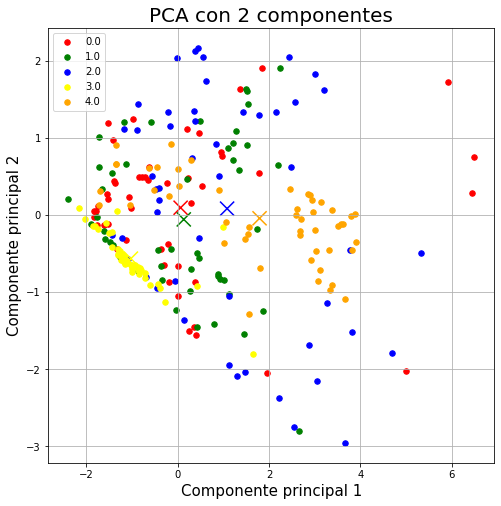

In [17]:
#gŕafica de los datos
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('PCA con 2 componentes', fontsize = 20)

targets = [0.0, 1.0, 2.0, 3.0, 4.0]
colors = ['r', 'g', 'b', 'yellow', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = final_class_val_pca['target'] == target
    ax.scatter(final_class_val_pca.loc[indicesToKeep, 'principal component 1']
               , final_class_val_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)

ax.scatter(centers[:,0], centers[:,1], marker="x", color=colors, s=200, linewidths=10)
ax.legend(targets)
ax.grid()

ii) Realice el mismo análisis para LDA, considerando el mismo conjunto de puntos.

In [18]:
from sklearn import discriminant_analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)

#se ajusta el modelo
X_class_train_lda = lda.fit(X_class_train,y_class_train.values.ravel())

#se aplica el modelo
X_class_val_lda = lda.transform(X_class_val)

#Se agregan titulos a los ejes
x_class_val_lda = pd.DataFrame(data=X_class_val_lda, columns = ['principal component 1', 'principal component 2'])

#se unen los datos con sus target
final_class_lda = pd.concat([x_class_val_lda,y_class_val], axis = 1)

#Cálculo de los centros de gravedad
centroids = []
for i in range(5):
    centroids.append([final_class_lda[final_class_lda['target'] == i].loc[:,'principal component 1'].mean()
                  ,final_class_lda[final_class_lda['target'] == i].loc[:,'principal component 2'].mean()])
centers_lda = np.array(centroids)

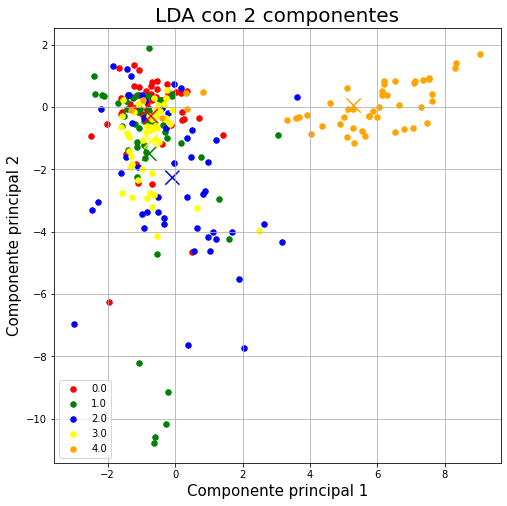

In [19]:
#gŕafica de los datos
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('LDA con 2 componentes', fontsize = 20)

targets = [0.0, 1.0, 2.0, 3.0, 4.0]
colors = ['r', 'g', 'b', 'yellow', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = final_class_lda['target'] == target
    ax.scatter(final_class_lda.loc[indicesToKeep, 'principal component 1']
               , final_class_lda.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)

ax.scatter(centers_lda[:,0], centers_lda[:,1], marker="x", color=colors, s=200, linewidths=5)
ax.legend(targets)
ax.grid()

#### 2.f Más reducción de dimensionalidad
Entrene un modelo de regresión logística para el método que le pareció más apropiado de la pregunta anterior, haciendo variar el número de componentes de 2 a 120. Calcule para cada modelo alguna métrica de la calidad del modelo tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación. 

Grafique cómo varían ambos errores en función de la dimensionalidad sobre la que se trabaja. 

Primero se debe pre procesar los datos de test, los cuales no habían sido ocupados en esta etapa

In [31]:
#Separación de las 5 clases
Class_0 = data_test[data_test['target'] == 0] 
Class_1 = data_test[data_test['target'] == 1]
Class_2 = data_test[data_test['target'] == 2]
Class_3 = data_test[data_test['target'] == 3]
Class_4 = data_test[data_test['target'] == 4]

X_class_0 = Class_0.drop(columns = ['target']).head(50)
X_class_1 = Class_1.drop(columns = ['target']).head(50)
X_class_2 = Class_2.drop(columns = ['target']).head(50)
X_class_3 = Class_3.drop(columns = ['target']).head(50)
X_class_4 = Class_4.drop(columns = ['target']).head(50)

y_class_0 = Class_0[["target"]].head(50).reset_index(drop=True)
y_class_1 = Class_1[["target"]].head(50).reset_index(drop=True)
y_class_2 = Class_2[["target"]].head(50).reset_index(drop=True)
y_class_3 = Class_3[["target"]].head(50).reset_index(drop=True)
y_class_4 = Class_4[["target"]].head(50).reset_index(drop=True)

#Se unen los datos
X_class_test = pd.concat([X_class_0, X_class_1, X_class_2, X_class_3, X_class_4], axis=0)
y_class_test = pd.concat([y_class_0, y_class_1, y_class_2, y_class_3, y_class_4], axis=0).reset_index(drop=True)

#Se estandariza X
X_class_test = pd.DataFrame(scaler.fit_transform(X_class_test))

In [41]:
X_class_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.839843,0.760084,0.511228,0.334358,0.270910,0.287969,0.263530,0.278930,0.283051,0.248887,...,0.019591,0.020684,0.020222,0.019095,0.014798,0.014777,0.014249,0.013586,0.014198,0.022611
std,0.274067,0.252233,0.261756,0.269985,0.229796,0.232174,0.221507,0.233426,0.229672,0.203378,...,0.102211,0.106780,0.104872,0.104239,0.093221,0.093128,0.090682,0.087734,0.090512,0.134348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.824674,0.681491,0.321147,0.113052,0.109046,0.132363,0.114609,0.118874,0.120112,0.108697,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.959791,0.850251,0.506292,0.287326,0.191678,0.197128,0.165966,0.200572,0.212365,0.191783,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.928194,0.723668,0.505444,0.367044,0.385849,0.374911,0.383150,0.377309,0.322181,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=250)

scores = []
eje_x = []

for i in range(2,120,5):
    
    pca = PCA(n_components=i)
    
    X_class_train_PCA = pca.fit_transform(X_class_train,y_class_train.values.ravel())
    X_class_val_PCA = pca.transform(X_class_val)
    X_class_tst_PCA = pca.transform(X_class_test)
    
    reg.fit(X_class_train_PCA,y_class_train.values.ravel())
    reg.predict(X_class_val_PCA)
    reg.predict(X_class_tst_PCA)
    scores.append([reg.score(X_class_val_PCA,y_class_val),reg.score(X_class_tst_PCA,y_class_test)])
    eje_x.append(i)

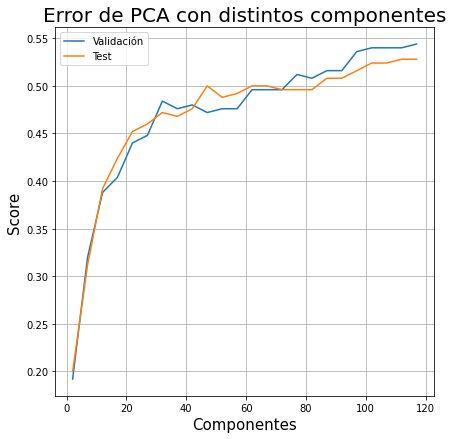

In [43]:
#gŕafica de los datos
fig = plt.figure(figsize = (80,80))
ax = fig.add_subplot(10,10,10) 
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_ylabel('Score', fontsize = 15)
ax.set_title('Error de PCA con distintos componentes', fontsize = 20)

ax.plot(eje_x,scores)

ax.legend(['Validación','Test'])
plt.grid();

*Ojo: PCA se debiese ajustar con el conjunto de entrenamiento, luego tanto el conjunto de validación y test deben ser transformados por el PCA ya ajustado para ser evaluados*

#### 2.g Naive Bayes
"Entrene" un modelo utilizando Naive Bayes y comparelo con el modelo logístico que entrenó anteriormente. Le parece adecuado el nombre _Naive_?

In [57]:
from sklearn import naive_bayes as sknb
NB = sknb.BernoulliNB()

y_pred_nb = NB.fit(x_tr, y_tr.values.ravel()).predict(x_val)
NB.score(x_val,y_val)

0.3799063463661629

Claramente al evaluar el `score` del Naive Bayes, este obtiene un valor muy bajo, de 0.382, que al comprarse con el 0.911 obtenido en el modelo logístico se nota una gran deficiencia a la hora de evaluar. 

Considerando esto se puede tener una idea de porque se llama *Naive*.

Por otro lado, se procede a hacer una matriz de confusión para poder comprobar de otra forma el rendimiento de Naive Bayes.

In [61]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred_nb)
confusion_matrix

array([[7395,   87, 4106, 4835, 5337],
       [ 268,   75,   92,  159,   88],
       [ 371,   25,  478,  346,  457],
       [  10,    1,    2,  172,    0],
       [  69,    0,    3,   32, 1859]])

Aquí se puede notar como para datos distintos a 0, las clasificaciones no estuvieron tan erradas, sobre todo en las últimas 2 categorías, ya que para la categoría 3 sólo 13 ocaciones falló la predicción, asignandole otro valor. De la misma forma en 104 ocaciones se predijo otro valor distinto para la categoría 4, acertando en 1859. 

Para el resto de ocaciones falla un poco más, confirmando lo dicho anteriormente para este tipo de predicción.

# 3. Selección de atributos

En este tercera parte estudiaremos el dataset "Birds' Songs Numeric Dataset", el cual se encuentra en el siguiente link de Kaggle: https://www.kaggle.com/fleanend/birds-songs-numeric-dataset Nuestra tarea será reconocer la especie del pájaro que canta, basándonos en información numérica de este canto. El dataset está compuesto de 88 especies.

<img src="https://www.dailynews.lk/sites/default/files/news/2018/04/01/z_p26-Why.jpg"  style="height:10cm;"  />

In [0]:
# Ir a la página de Kaggle para crear API Token y subir el kaggle.json 
# con las credenciales, luego crear la carpeta /root/.kaggle y copiar el archivo ahí. 
# Después hacer privado el archivo (permisos de lectura solo yo).
!mkdir .kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# Descargar datos de la API
!kaggle datasets download fleanend/birds-songs-numeric-dataset

 67% 17.0M/25.3M [00:00<00:00, 20.0MB/s]
100% 25.3M/25.3M [00:00<00:00, 39.8MB/s]


In [13]:
# Descomprimir la data
!unzip birds-songs-numeric-dataset.zip

Archive:  birds-songs-numeric-dataset.zip
  inflating: test.csv                
  inflating: train.csv               


#### 3.a Carga de datos 

Cargue los datos a un DataFrame. Elimine las columnas indicadas. 

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df=pd.read_csv("train.csv")
features = list(df.columns)
features.remove('id')
features.remove('genus')
features.remove('species')
####
x_tr=df[features]
####

df_tst=pd.read_csv("test.csv")

####
x_tst=df_tst[features]
###

*Trate el conjunto de entrenamiento y test del mismo modo que en el punto 2, e.d, mantenga el conjunto de test estático y el conjunto de validación extráigalo de train.csv*

#### 3.b Procesamiento de datos y visualización

i) Una especie totalmente clasificada requiere género (genus) y especie (species) del pájaro en cuestión. Cree el target considerando ambas variables.

In [0]:
df["target"] = df[['genus', 'species']].agg('+'.join, axis=1)
df_tst["target"] = df_tst[['genus', 'species']].agg('+'.join, axis=1)

In [225]:
df_tst["target"].head()

0    Acanthis+flammea
1    Acanthis+flammea
2    Acanthis+flammea
3    Acanthis+flammea
4    Acanthis+flammea
Name: target, dtype: object

In [0]:
y_tr,y_tst = df["target"], df_tst["target"]

In [0]:
# Notar el guin bajo final, para la siguiente pregunta se usara otro tipo de particion para validar
x_tr_, x_val_, y_tr_, y_val_ = train_test_split(x_tr, y_tr, test_size=0.3, random_state=42)

ii) ¿Las clases están equiparadas en el conjunto de entrenamiento y test?

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

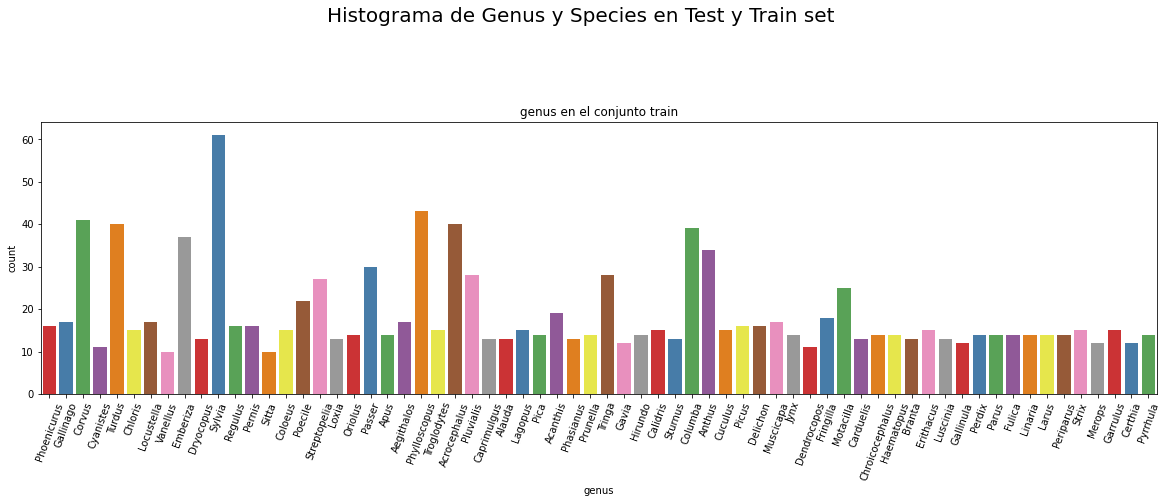

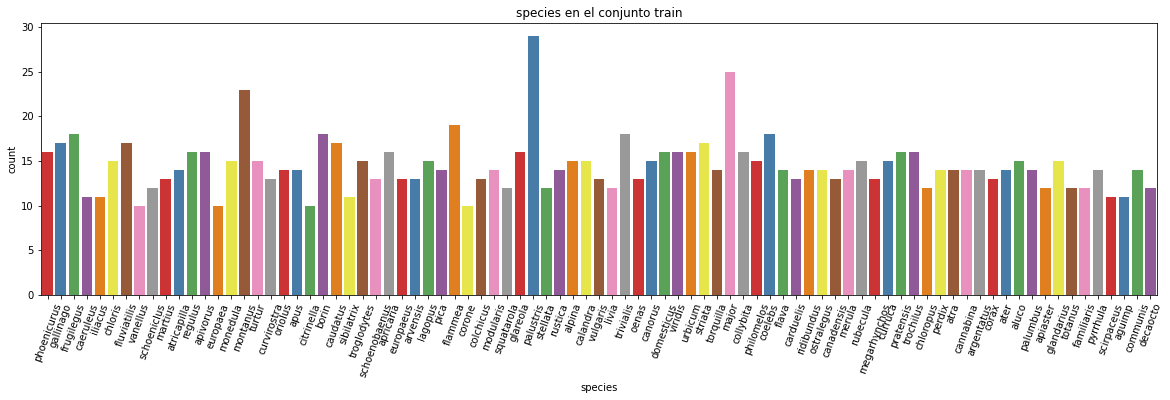

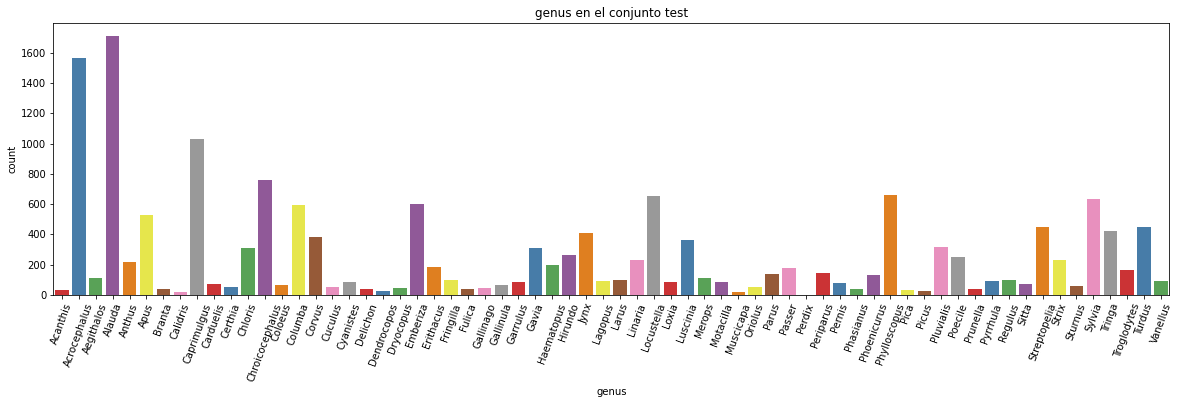

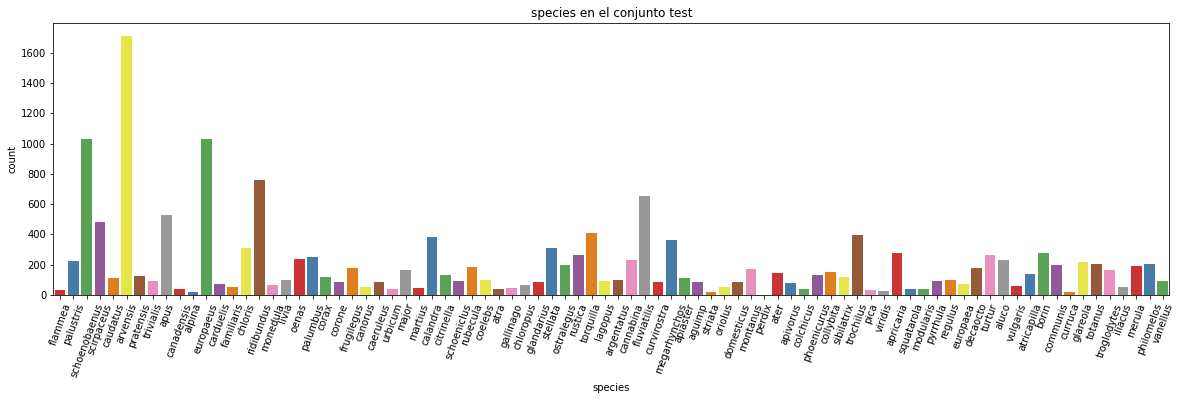

In [76]:
# graficar histogramas de ambos conjuntos
# Esto fue antes de fusionar genus+species (no ejecutar pls)
plt.rcParams['figure.figsize']=[20,5] # <- Controla el tamaño del plot dentro del Notebook
attr = ['genus', 'species']
d_set = [y_tr_, y_tst];
d_set_nm = ['train', 'test'];
plt.suptitle('Histograma de Genus y Species en Test y Train set',size=20,y=1.2)

for i in range(len(d_set)):
  for j in attr:
    plt.subplot(1,1,1)
    plt.title(j+" en el conjunto "+str(d_set_nm[i]))
    chart = sns.countplot(x=j, data=d_set[i], palette='Set1')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=70)
    plt.show();
    print("\n")

Se puede observar que el conjnto de entrenamiento tanto para Genus como para Species esta relativamente balanceado, sin embargo, en el conjunto de test ambos target estan completamente desbalanceados, algunos con frecuencias muy altas y otras muy bajas.

iii) Analice los datos de la manera que estime conveniente para decidir el pre-procesamiento a seguir (estandarización de todas la variables o sólo algunas variables, normalización, no pre-procesar, etc...). **Justifique el pre-procesamiento escogido. Incluya gráficos en su análisis**

In [124]:
x_tr_.describe()

,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,chromogram_0_7,chromogram_0_8,chromogram_0_9,chromogram_10_0,chromogram_10_1,chromogram_10_10,chromogram_10_11,chromogram_10_12,chromogram_10_2,chromogram_10_3,chromogram_10_4,chromogram_10_5,chromogram_10_6,chromogram_10_7,chromogram_10_8,chromogram_10_9,chromogram_11_0,chromogram_11_1,chromogram_11_10,chromogram_11_11,chromogram_11_12,chromogram_11_2,chromogram_11_3,chromogram_11_4,chromogram_11_5,chromogram_11_6,chromogram_11_7,chromogram_11_8,chromogram_11_9,chromogram_1_0,...,chromogram_7_9,chromogram_8_0,chromogram_8_1,chromogram_8_10,chromogram_8_11,chromogram_8_12,chromogram_8_2,chromogram_8_3,chromogram_8_4,chromogram_8_5,chromogram_8_6,chromogram_8_7,chromogram_8_8,chromogram_8_9,chromogram_9_0,chromogram_9_1,chromogram_9_10,chromogram_9_11,chromogram_9_12,chromogram_9_2,chromogram_9_3,chromogram_9_4,chromogram_9_5,chromogram_9_6,chromogram_9_7,chromogram_9_8,chromogram_9_9,spec_centr_0,spec_centr_1,spec_centr_10,spec_centr_11,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,...,1.232000e+03,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,0.286225,0.299707,0.291728,0.300221,0.282763,0.283951,0.296045,0.271530,0.279186,0.269000,0.267901,0.276384,0.280125,0.292481,0.287422,0.264838,0.253953,0.283748,0.279138,0.285569,0.300977,0.315677,0.317570,0.317166,0.308045,0.291118,0.294974,0.300850,0.284816,0.273387,0.280387,0.275344,0.271773,0.265529,0.294433,0.288809,0.275287,0.270693,0.284588,0.262763,...,2.963898e-01,0.279552,0.288420,0.319261,0.310599,0.298642,0.280085,0.288830,0.297101,0.294389,0.281435,0.310991,0.302213,0.313431,0.277824,0.290169,0.285425,0.291606,0.306269,0.298113,0.303556,0.316799,0.318306,0.302170,0.307549,0.314448,0.296323,1969.731569,1981.716406,1943.570727,1985.161197,1999.272651,1979.895815,1952.686419,1940.966326,1945.939815,1942.286173,1945.205944,1956.798092,1930.428548
std,0.358870,0.356028,0.353649,0.361546,0.355596,0.348163,0.371347,0.344838,0.346082,0.337045,0.333809,0.342086,0.346148,0.355060,0.347127,0.322849,0.303014,0.328861,0.335464,0.338527,0.353094,0.353428,0.349360,0.350634,0.357041,0.346381,0.353647,0.358738,0.341351,0.334871,0.343292,0.335920,0.337663,0.335478,0.349050,0.343251,0.332458,0.326091,0.341030,0.343387,...,3.515611e-01,0.346115,0.352987,0.365468,0.357310,0.353626,0.341258,0.343891,0.343600,0.347107,0.341140,0.356465,0.336714,0.363026,0.346351,0.351565,0.333022,0.336269,0.340491,0.355677,0.353043,0.366173,0.351670,0.344363,0.346885,0.354694,0.340699,930.793470,885.793504,795.848116,792.929743,818.816544,841.643311,823.412423,813.499500,798.519178,797.377421,814.218314,815.591671,808.180751
min,0.000017,0.000016,0.000007,0.000046,0.000072,0.000014,0.000015,0.000019,0.000009,0.000009,0.000008,0.000009,0.000006,0.000038,0.000020,0.000009,0.000061,0.000088,0.000015,0.000011,0.000008,0.000020,0.000015,0.000007,0.000011,0.000009,0.000021,0.000015,0.000009,0.000056,0.

Al parecer no todos los atributos no estan centrados en 0, y muchos se mueven entre 0 y 1, hay otros con distintas escalas, por lo tanto se decide proceder con estandarizar.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Por ahora sin validation set para ver las mejoras 
scaler_x = StandardScaler()

scaler_x.fit(x_tr_.values)

x_tr_st=scaler_x.transform(x_tr_.values)
x_val_st=scaler_x.transform(x_val_.values)

In [127]:
print(x_tr_st.shape, y_tr_.shape)

(1232, 169) (1232,)


In [128]:
print(x_val_st.shape, y_val_.shape)

(528, 169) (528,)


In [129]:
reg = LogisticRegression()
reg.fit(x_tr_st,y_tr_)
reg.score(x_val_st,y_val_)

0.9564393939393939

#### 3.c Selección de Atributos _by hand_
En esta parte comenzaremos entrenando un modelo sin ningún atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_ como aprendió en la pregunta 1.
Para el modelo sin ningún atributo utilizaremos una predicción constante igual a la especie+género más repetida en el conjunto de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error ha utilizar para esta pregunta será de libre elección, busque loss functions for classification en internet, ocupe alguna implementada en sklearn o implemente alguna usted. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes. 
Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregando, luego grafíque el error promedio en función del nuemero de atributos seleccionados.
¿Cuál es el modelo que entrenga un menor error de validación (cuál es su lista de atributos)?

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss

In [0]:
# Mantiene un porcentaje de ejempos por clase
sss = StratifiedShuffleSplit(n_splits=5)

# esta estructura de código es solo una guía y presupone que x_tr es un DataFrame
restantes = list(x_tr.columns)
actuales = []
errores = []

while len(actuales) < 10:
    
    error_atributo = dict()
    for atributo_candidato in restantes:
        error_fold = []
        fold = x_tr[actuales+[atributo_candidato]]

        # hacer 5- fold 
        for train_index, val_index in sss.split(fold, y_tr):

            # entrenar estandarizador
            # sin mirar conjunto de validacion
            scaler_x = StandardScaler()
            scaler_x.fit(fold.iloc[train_index].values)
            x_std=scaler_x.transform(fold.iloc[train_index].values)
            x_val=scaler_x.transform(fold.iloc[val_index].values)
            y_train = y_tr.iloc[train_index].values
            y_val = y_tr.iloc[val_index].values
            # crear nuevo modelo
            model = LogisticRegression(max_iter=7)      
            model.fit(x_std, y_train)

            #calcular error            
            y_pr = model.predict_proba(x_val)
            err = log_loss(y_val, y_pr)
            error_fold.append(err)

        # promediar error y guardar
        error_atributo[atributo_candidato] = np.mean(error_fold)

    # evaluar cual se queda y quitarlo de restantes
    atr_select = min(error_atributo, key=error_atributo.get)
    errores.append(error_atributo[atr_select])
    actuales.append(atr_select)
    restantes.remove(atr_select)

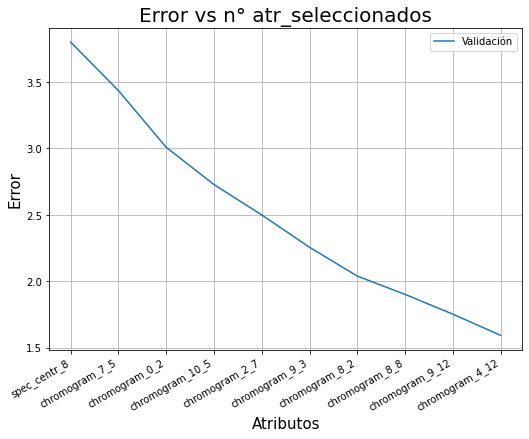

In [219]:

#gŕafica de los datos
fig = plt.figure(figsize = (100,70))
ax = fig.add_subplot(10,10,10) 
ax.set_xlabel('Atributos', fontsize = 15)
ax.set_ylabel('Error', fontsize = 15)
ax.set_title('Error vs n° atr_seleccionados', fontsize = 20)

ax.plot(actuales, errores)

ax.legend(['Validación'])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.grid();

#### 3.d Validar
Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de cómo varía el error de entrenamiento (error sobre `x_tr`) y de validación (sobre `x_val`) a medida va agregando los atributos. Comente cómo sus hallazgos se relacionan con lo aprendido teóricamente. 

In [0]:
error_tr = []
error_val = []

temp = []

for atr in actuales:
    temp.append(atr)
    clsfr = LogisticRegression()
    clsfr.fit(x_tr_st, y_tr_)
    y_tr_pred = clsfr.predict_proba(x_tr_st)
    y_val_pred = clsfr.predict_proba(x_val_st)
    tr_cross = log_loss(y_tr_ ,y_tr_pred)
    val_cross = log_loss(y_val_ ,y_val_pred)
    error_tr.append(tr_cross)
    error_val.append(val_cross)

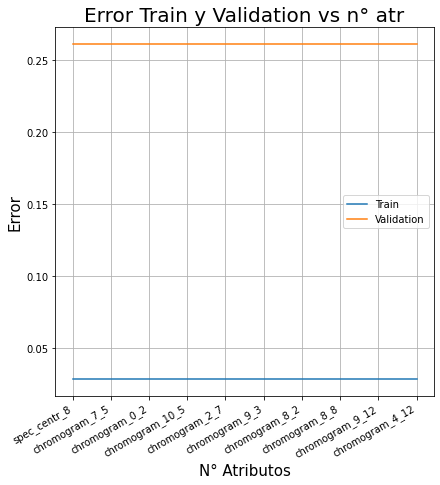

In [258]:
#gŕafica de los datos
fig = plt.figure(figsize = (80,80))
ax = fig.add_subplot(10,10,10) 
ax.set_xlabel('N° Atributos', fontsize = 15)
ax.set_ylabel('Error', fontsize = 15)
ax.set_title('Error Train y Validation vs n° atr', fontsize = 20)

ax.plot(actuales,error_tr)
ax.plot(actuales,error_val)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend(['Train','Validation'])
plt.grid();

Por la diferencia que hay entre ambas curvas se logra apreciar que a pesar de no haber explorado a través de todos los atributos, los errores son bajos y cercanos, y al no hay sesgo ni varianza observable en el gráfico, se puede concluir que esos atributos son una buena elección para entrenar el modelo.

#### 3.e Mutual information
Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
¿Qué información puede obtener de estos resultados? ¿Concuerdan los valores encontrados con lo encontrado en la pregunta anterior? 

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
le.fit(y_tr)
y_trrn = le.transform(y_tr)

In [0]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr, y_trrn),x_tr.columns))

In [253]:
a = {"a":4, "z":2, "b":6}
max(a, key=a.get)

'b'

In [256]:
maximos = dict()
Mi = dict(MI)
while len (maximos) <= 10:
    maxi = max(Mi, key=Mi.get)
    maximos[Mi[maxi]] = maxi
    del Mi[maxi]
maximos

{'spec_centr_10': 3.5827498246724407,
 'spec_centr_11': 2.418790049358384,
 'spec_centr_12': 1.716008508395424,
 'spec_centr_2': 3.627663198577058,
 'spec_centr_3': 3.659563599200982,
 'spec_centr_4': 3.6064643501806177,
 'spec_centr_5': 3.580287678004548,
 'spec_centr_6': 3.5463149686614486,
 'spec_centr_7': 3.5704340271022237,
 'spec_centr_8': 3.6858585331661584,
 'spec_centr_9': 3.577231045100625}

Lamentablemente solo coincide 1 (spec_centr_8). La forma de obtener esta información depende completamente de la dependencia o independencia condicional de los datos y el target, además el método anterior no iteró sobre todos los datos, por lo tanto habría que probar contra todos los datos para hacer una comparación justa.